Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# 4. Graph Measures
Ein Graph ist ein mathematisches Modell, zur Beschreibung von Beziehungen und Entitäten (Knoten). Jeder Graph hat dabei unterschiedliche Eigenschaften. Mit Hilfe von verschiedenen Massen können diese Eigenschaften gemessen werden. Jede Messung kann einen oder mehrere lokale und globale Aspekte des Graphen charakterisieren.

In [26]:
from gml.graph.graph_builder import GraphBuilder

## 4.1 Integration
Mit Hilfe von Integrationsmetriken wird gemessen, wie sehr die Knoten miteinander verbunden sind.

### Distance, path, shortest path

Das Konzept der Entfernung in einem Graphen bezieht sich auf die Anzahl Verbindungen zwischen einem Quell- und Zielknoten. Der kürzeste Pfad (**shortest path**) zwischen zwei Knoten ist der Pfad mit der kleinsten Anzahl Verbindungen im Vergleich zu allen anderen möglichen Verbindungen.

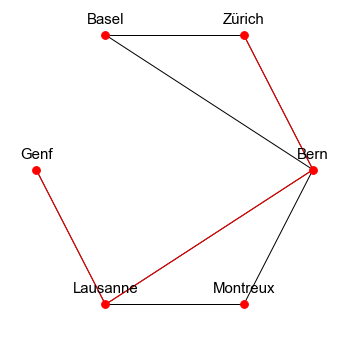

In [27]:
edges = [('Genf', 'Lausanne'), ('Lausanne', 'Montreux'), ('Montreux', 'Bern'), ('Lausanne', 'Bern'), ('Bern', 'Zürich'), ('Bern', 'Basel'), ('Basel', 'Zürich')]
graph = GraphBuilder().append_edges(edges).create()

shortest_path = graph.shortest_path('Genf', 'Zürich')
graph.draw(path=shortest_path)

In [28]:
print(shortest_path)

['Genf', 'Lausanne', 'Bern', 'Zürich']


### Average shortest path
Die charakteristische Pfadlänge ist der Durchschnitt aller kürzesten Pfadlängen (**shortest path average**) zwischen allen möglichen Knotenpaaren.

In [29]:
combinations = graph.shortest_path_combinations()
print(combinations)

      Source    Target                   Shortest path  Number of edges
0       Genf  Lausanne                [Genf, Lausanne]                1
1       Genf  Montreux      [Genf, Lausanne, Montreux]                2
2       Genf      Bern          [Genf, Lausanne, Bern]                2
3       Genf    Zürich  [Genf, Lausanne, Bern, Zürich]                3
4       Genf     Basel   [Genf, Lausanne, Bern, Basel]                3
5   Lausanne  Montreux            [Lausanne, Montreux]                1
6   Lausanne      Bern                [Lausanne, Bern]                1
7   Lausanne    Zürich        [Lausanne, Bern, Zürich]                2
8   Lausanne     Basel         [Lausanne, Bern, Basel]                2
9   Montreux      Bern                [Montreux, Bern]                1
10  Montreux    Zürich        [Montreux, Bern, Zürich]                2
11  Montreux     Basel         [Montreux, Bern, Basel]                2
12      Bern    Zürich                  [Bern, Zürich]          

In [30]:
total_edges = sum(combinations['Number of edges'])
total_combi = len(combinations)

print("Total edges           : ", total_edges)
print("Total combinations    : ", total_combi)
print("Average shortest path : ", total_edges / total_combi)

Total edges           :  25
Total combinations    :  15
Average shortest path :  1.6666666666666667


**Verification**

In [31]:
print("Average shortest path : ", graph.shortest_path_average())

Average shortest path :  1.6666666666666667


### Global and local efficiency
Die **globale Effizienz** ist der Durchschnitt der inversen kürzesten Pfadlängen aller Knotenpaare. Es ist ein Mass für die **Effizienz des Informationsaustauschs** innerhalb des Graphen. Bei der **lokalen Effizienz** Berechnung wird nur die Nachbarschaft des Knotens berücksichtigt ohne den Knoten selbst.


In [32]:
print("Global efficiency :", graph.efficiency())
print("Local efficiency  :", graph.efficiency(local=True))

Global efficiency : 0.711111111111111
Local efficiency  : 0.611111111111111


**Comparsion to fully connected graph**

Der höchste Effizienzwert 1 wird erreicht, wenn ein Graph vollständig zusammenhängend ist.

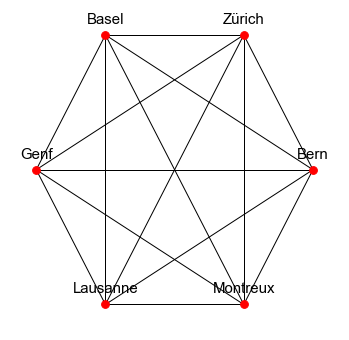

In [33]:
fully_connected_graph = GraphBuilder().append_nodes(graph.nodes, fully_connected=True).create()
fully_connected_graph.draw()

In [34]:
print("Global efficiency :", fully_connected_graph.efficiency())
print("Local efficiency  :", fully_connected_graph.efficiency(local=True))

Global efficiency : 1.0
Local efficiency  : 1.0


## 4.2 Segregation
Mit den Segregationsmetriken werden zusammenhängende Gruppen eines Graphen quantifiziert. Diese bezeichnet man auch als Gemeinschaften (communities) oder Module innerhalb eines Graphen.

### Clustering coefficient

Der Clustering Koeffizient misst den **Anteil von Teilgraphen** innerhalb eines Graphen. Ein vollständiger Teilgraph besteht aus **3 Knoten und 3 Verbindungen**.  Der Wert wird pro Knoten berechnet.

Im folgenden Beispiel haben Basel, Zürich und Montreux einen Koeffizienten von 1 während der Wert für Bern und Lausanne kleiner ist, da sie noch weitere Verbindungen haben. Genf hat den Wert 0, da es nicht Bestandteil eines Teilgraphen ist.

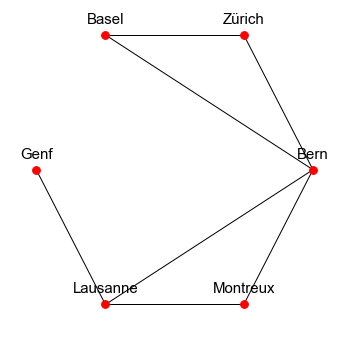

In [35]:
graph.draw()

In [36]:
print(graph.clustering(), "\n")
print("Average :", graph.clustering(average=True))

  Clustering  Coefficient
0       Genf     0.000000
1   Lausanne     0.333333
2   Montreux     1.000000
3       Bern     0.333333
4     Zürich     1.000000
5      Basel     1.000000 

Average : 0.611111111111111


**Transitivity**

Eine Variante des Clustering Koeffizienten ist die Transitivität. Diese gibt das Verhältnis zwischen der Anzahl geschlossener Teilgraphen (Triple) und der maximal möglichen Anzahl Triple an.

In [37]:
print("Transitivity : ", graph.transitivity())

Transitivity :  0.5


### Modularity
Die Modularität ist ein **Mass für die Gruppierungen** innerhalb eines Graphen. Bei Netzwerken mit hoher Modularität sind die **Knoten einer  Gruppierungen dicht miteingander verbunden**, während dem die **Gruppierungen untereinander nur wenige Vebindungen** aufweisen. Zur Berechnung der Modularität müssen entsprechende Gemeinschaften (communities) gebildet werden.

In [38]:
communities = [('Genf', 'Lausanne', 'Montreux'), ('Bern', 'Basel', 'Zürich')]
print("Communities : ", communities)
print("Modularity  : ", graph.modularity(communities))

Communities :  [('Genf', 'Lausanne', 'Montreux'), ('Bern', 'Basel', 'Zürich')]
Modularity  :  0.20408163265306123


## 4.3 Centrality
Die Zentralitätsmetriken bewerten die Bedeutung einzelner Knoten innerhalb des Netzwerkes.
- Der Grad (**centrality degree**) gibt an mit wie vielen möglichen Knoten vom Graphen ein entsprechender Knoten verbunden ist. Je mehr Verbindungen bestehen umso höher der Wert, d.h. umso zentraler ist der entsprechende Knoten.
- Die Nähe (**centrality closeness**) eines Knoten gibt an inwieweit ein Knoten mit anderen Knoten eng (gut) verbunden ist. Dabei wird die durchschnittliche Entfernung eines Knotens zu allen anderen Knoten im Netzwerk berechnet.
- Die Verflechtung (**centrality betweenness**) bewertet inwieweit ein Knoten als Brückenfunktion zwischen anderen Knoten fungiert. Selbst wenn ein Knoten insgesammt schlecht verbunden ist, kann er für den gesammten Graphen strategisch wichtig sein, da er z.B. sicherstellt, dass das gesamte Netzwerk verbunden bleibt.

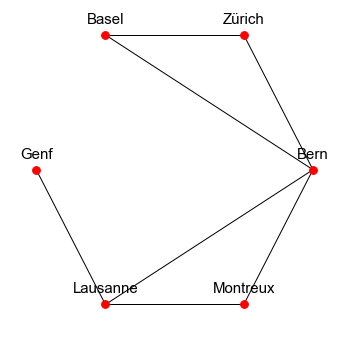

In [39]:
graph.draw()

In [40]:
print(graph.centrality())

  Centrality  Degreee  Closeness  Betweenness
0       Genf      0.2   0.454545          0.0
1   Lausanne      0.6   0.714286          0.4
2   Montreux      0.4   0.625000          0.0
3       Bern      0.8   0.833333          0.6
4     Zürich      0.4   0.555556          0.0
5      Basel      0.4   0.555556          0.0


**Degree vs. Betweenness**

Das folgende Beispiel zeigt gut dass die beiden Knoten D und E zwar insgesammt wenige Verkünfungen haben (**centrality degree**) aber als Brückenfunktion für den Graphen sehr wichtig sind (**centrality betweenness**).

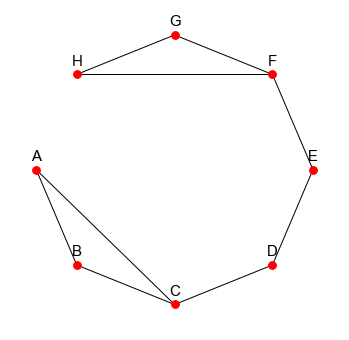

  Centrality   Degreee  Closeness  Betweenness
0          A  0.285714   0.333333     0.000000
1          B  0.285714   0.333333     0.000000
2          C  0.428571   0.437500     0.476190
3          D  0.285714   0.500000     0.571429
4          E  0.285714   0.500000     0.571429
5          F  0.428571   0.437500     0.476190
6          G  0.285714   0.333333     0.000000
7          H  0.285714   0.333333     0.000000


In [41]:
centrality_edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D','E'), ('E', 'F'), ('F', 'G'), ('F', 'H'), ('H', 'G')]
centrality_graph = GraphBuilder().append_edges(centrality_edges).create()
centrality_graph.draw()
print(centrality_graph.centrality())

## 4.4 Resilence
Mit den Wiederstandsfähigkeitsmetriken erhält man ein Mass dafür, wie sehr eine Netzwerk seine "Betriebsfähigkeit" oder Leistung aufrechterhalten kann wenn es zu Ausfällen oder anderen Ereignissen kommt. In einem Verkehrsnetz können so zum Beispiel Schlüsselverbindungen oder Punkte detektiert werden, die für den ganzen Betrieb zentral sind.

### Assortativity coefficient

Mit der Assortativität wird die Tendenz von Konten gemessen wie stark sie mit ähnlichen Knoten verbunden sind. Eine häufige Methode zur Messung ist der Pearson Korrelationskoeffizient.

Der Koeffizient nimmt positive Werte an wenn es eine Korrelation zwischen Knoten mit ähnlichem Grad gibt, während er negative Werte annimmt, wenn es eine Korrelation zwischen Knoten unterschiedlichen Grades gibt.

Das folgende Beispiel zeigt die Werte der beiden obigen Graphen:

In [42]:
print(graph.assortativity(pearson=True))
print(centrality_graph.assortativity(pearson=True))

-0.39999999999999986
-0.5


---
_The end._